In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov

In [2]:
#from notebook_utils import segmentation_map_to_image, download_file

In [3]:
from pathlib import Path

base_model_dir = Path("./files/A_20240630/model").expanduser()

model_name = "nanonet-fp32-shape-1-256-256-3-model"
model_xml_name = f"{model_name}.xml"
model_bin_name = f"{model_name}.bin"

model_xml_path = base_model_dir / model_xml_name


In [4]:
print(model_xml_path)

files/A_20240630/model/nanonet-fp32-shape-1-256-256-3-model.xml


In [5]:
import ipywidgets as widgets

core = ov.Core()
device = widgets.Dropdown(
    options=core.available_devices + ["AUTO"],
    value="AUTO",
    description="Device:",
    disabled=False,
)

device

Dropdown(description='Device:', index=1, options=('CPU', 'AUTO'), value='AUTO')

In [6]:
core = ov.Core()

model = core.read_model(model=model_xml_path)
compiled_model = core.compile_model(model=model, device_name=device.value)

input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output(0)

Print out the input layer and output layer shapes.

In [7]:
# Get input and output layer information
input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output(0)

# Print details of input layer
print("Input Layer Details:")
print(f"Name: {input_layer_ir.any_name}")
print(f"Partial Shape: {input_layer_ir.partial_shape}")
print(f"Precision: {input_layer_ir.element_type}")

# Print details of output layer
print("Output Layer Details:")
print(f"Name: {output_layer_ir.any_name}")
print(f"Partial Shape: {output_layer_ir.partial_shape}")
print(f"Precision: {output_layer_ir.element_type}")


Input Layer Details:
Name: input_image
Partial Shape: [1,256,256,3]
Precision: <Type: 'float32'>
Output Layer Details:
Name: activation_15
Partial Shape: [1,256,256,1]
Precision: <Type: 'float32'>


Draw the mask onto the original image.

files/A_20240630/model/endo01.jpg


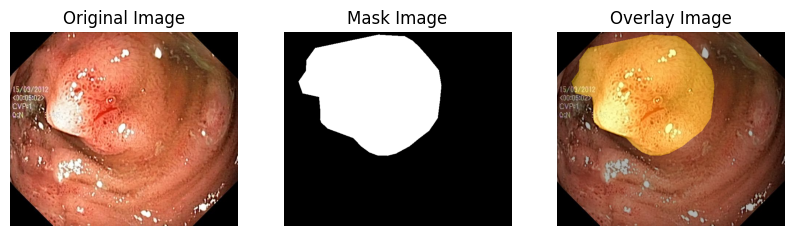

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to the images
original_image_path = str (base_model_dir / "endo01.jpg")
mask_image_path = str (base_model_dir / "endo01_mask.jpg")
print (original_image_path)

""" Hyperparameters """
size = (256, 256)
input_shape = (256, 256, 3)

# Load the original image and the mask
original_image = cv2.imread(original_image_path)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)  # Load mask as grayscale
ori_mask = cv2.resize(mask_image, size)

# Ensure the mask is binary
_, mask_binary = cv2.threshold(mask_image, 127, 255, cv2.THRESH_BINARY)

# Create an RGB version of the mask where the white areas are converted to yellow
mask_rgb = np.zeros_like(original_image)
mask_rgb[mask_binary == 255] = [0, 255, 255]  # Yellow color in BGR format

# Blend the original image with the mask
alpha = 0.3  # Transparency factor
overlay = cv2.addWeighted(mask_rgb, alpha, original_image, 1 - alpha, 0)

# Convert the image from BGR to RGB for displaying with matplotlib
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask Image')
plt.imshow(mask_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Overlay Image')
plt.imshow(overlay_rgb)
plt.axis('off')

plt.show()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import openvino as ov
from pathlib import Path

# Function to visualize the overlay
def visualize_overlay(original_image, mask, alpha=0.3):
    # Create an RGB version of the mask where the white areas are converted to yellow
    mask_rgb = np.zeros_like(original_image)
    mask_rgb[mask == 1] = [0, 255, 255]  # Yellow color in BGR format

    # Blend the original image with the mask
    overlay = cv2.addWeighted(mask_rgb, alpha, original_image, 1 - alpha, 0)

    # Convert the image from BGR to RGB for displaying with matplotlib
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Plot the images
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image_rgb)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Mask Image')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Overlay Image')
    plt.imshow(overlay_rgb)
    plt.axis('off')

    plt.show()

## Do a inference on the original image.

In [10]:

# Paths to the model files

# Load the model
ie = ov.Core()
model = ie.read_model(model=model_xml_path)
compiled_model = ie.compile_model(model=model, device_name="CPU")

# Get input and output layer information
input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output(0)

# Print details of input and output layers
print("Input Layer Details:")
print(f"Name: {input_layer_ir.any_name}")
print(f"Partial Shape: {input_layer_ir.partial_shape}")
print(f"Precision: {input_layer_ir.element_type}")

print("Output Layer Details:")
print(f"Name: {output_layer_ir.any_name}")
print(f"Partial Shape: {output_layer_ir.partial_shape}")
print(f"Precision: {output_layer_ir.element_type}")


Input Layer Details:
Name: input_image
Partial Shape: [1,256,256,3]
Precision: <Type: 'float32'>
Output Layer Details:
Name: activation_15
Partial Shape: [1,256,256,1]
Precision: <Type: 'float32'>


files/A_20240630/model/endo01.jpg
Input Image Shape: (1, 256, 256, 3)
Input Image Type: float32
Result Shape: (1, 256, 256, 1)
Result Type: float32
Result Min Value: 2.0125184e-05
Result Max Value: 0.99999994
Unique Values in Result: [2.0125184e-05 2.0280821e-05 2.0354566e-05 ... 9.9999982e-01 9.9999988e-01
 9.9999994e-01]
Total Number of Elements in Result: 65536
Unique Values in Result: [[[[0.00029779]
   [0.00021329]
   [0.0001676 ]
   ...
   [0.00012166]
   [0.00012339]
   [0.00013017]]

  [[0.00016715]
   [0.00030618]
   [0.00043108]
   ...
   [0.00031305]
   [0.00026797]
   [0.00024592]]

  [[0.00022207]
   [0.00021048]
   [0.00042132]
   ...
   [0.00045869]
   [0.00030009]
   [0.0002375 ]]

  ...

  [[0.0001693 ]
   [0.00017312]
   [0.00031975]
   ...
   [0.00032162]
   [0.00029042]
   [0.00027627]]

  [[0.00021722]
   [0.00028381]
   [0.00026601]
   ...
   [0.00027694]
   [0.00026486]
   [0.00028852]]

  [[0.00013133]
   [0.0001022 ]
   [0.00021143]
   ...
   [0.00027198]
   [0

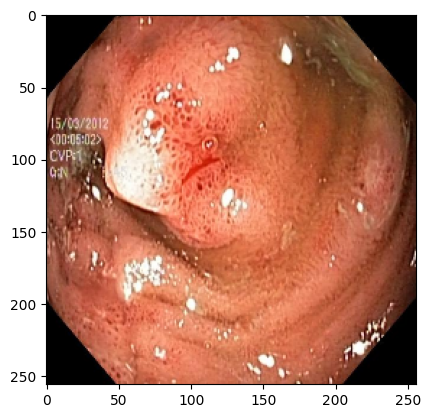

In [11]:
# Load and preprocess the original image
original_image_path = str (base_model_dir / "endo01.jpg")
print (original_image_path)
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)
#input_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
input_image = cv2.resize(original_image, (256, 256))  # Resize to 256x256
ori_img = input_image
rgb_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
ori_img = input_image
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
input_image = input_image.astype(np.float32)  # Ensure the image is float32

# Debug: Print input image shape and type
print("Input Image Shape:", input_image.shape)
print("Input Image Type:", input_image.dtype)

# Run inference
result  = compiled_model([input_image])[output_layer_ir]

# Debug: Print result shape and type
print("Result Shape:", result.shape)
print("Result Type:", result.dtype)
# Debug: Check result range and unique values
print("Result Min Value:", np.min(result))
print("Result Max Value:", np.max(result))
print("Unique Values in Result:", np.unique(result))
print("Total Number of Elements in Result:", result.size)
unique_values, unique_counts = np.unique(result, return_counts=True)
print("Unique Values in Result:", result)
print("Number of Unique Values in Result:", len(unique_values))



In [12]:
def mask_parse(mask):
    mask = np.squeeze(mask)
    mask = [mask, mask, mask]
    mask = np.transpose(mask, (1, 2, 0))
    return mask

In [13]:

pred_y = result
pred_y_saved = pred_y

pred_y = pred_y[0] > 0.5
pred_y = pred_y * 255

pred_y = np.array(pred_y, dtype=np.uint8)


In [14]:
ori_img = ori_img
ori_mask = mask_parse(ori_mask)
pred_y = mask_parse(pred_y)
sep_line = np.ones((size[0], 10, 3)) * 255

tmp = [
    ori_img, sep_line,
    ori_mask, sep_line,
    pred_y
]


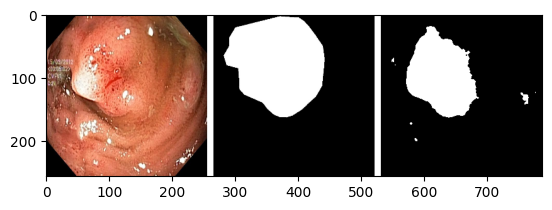

In [15]:
cat_images = np.concatenate(tmp, axis=1)
if cat_images.dtype != np.uint8:
    # Normalize if the array is in float format and convert to np.uint8
    if cat_images.dtype == np.float32 or cat_images.dtype == np.float64:
        # Normalize to 0-255 if it's in 0-1 range
        if cat_images.max() <= 1.0:
            cat_images = cat_images * 255
    # Convert to np.uint8
    cat_images = cat_images.astype(np.uint8)

# Convert BGR to RGB for display
cat_images_rgb = cv2.cvtColor(cat_images, cv2.COLOR_BGR2RGB)
plt.imshow(cat_images_rgb)

In [16]:
# Assuming pred_y is a binary mask after thresholding
# and ori_img is the original image read with cv2.IMREAD_COLOR

# Ensure pred_y_saved is a binary mask with values 0 or 1
pred_y_saved = pred_y_saved[0] > 0.5

# Convert the binary mask to uint8 type and scale it to the range [0, 255]
pred_y_saved = np.array(pred_y_saved, dtype=np.uint8) * 255

# Create an RGBA image with the original image and an alpha channel
ori_img_rgba = cv2.cvtColor(ori_img, cv2.COLOR_BGR2BGRA)

# Choose a color for the mask, e.g., yellow (BGR format)
mask_color = [0, 255, 255, 128]  # BGR format for yellow and 128 for alpha (semi-transparent)

# Create a colored mask with the same size as the original image
colored_mask = np.zeros_like(ori_img_rgba, dtype=np.uint8)

# Apply the mask color only to the areas where pred_y_saved is True
mask_indices = np.where(pred_y_saved == 255)
colored_mask[mask_indices[0], mask_indices[1], :3] = mask_color[:3]  # Apply color to the mask area
colored_mask[mask_indices[0], mask_indices[1], 3] = mask_color[3]    # Apply alpha to the mask area

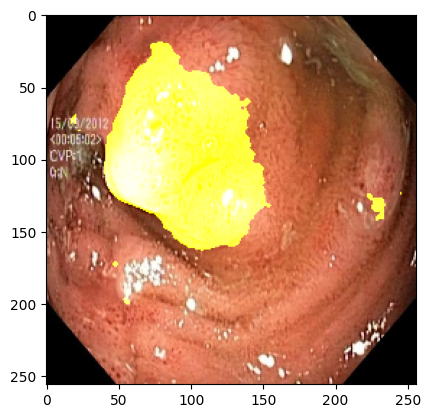

In [17]:
# Superimpose the mask onto the original image
superimposed_img = cv2.addWeighted(colored_mask, 1, ori_img_rgba, 1, 0)
rgb_image = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)